# Model recovery attack: `credit-card`

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import mra
from mra import *
import models
from models import *

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def make_dataset(X, Y, f):
    x = tf.data.Dataset.from_tensor_slices(X)
    y = tf.data.Dataset.from_tensor_slices(Y)
    x = x.map(f)
    xy = tf.data.Dataset.zip((x, y))
    xy = xy.shuffle(10000)
    return xy

df = pd.read_excel('../datasets/credit-card.xls', header=1, index_col=0).sample(frac=1)
x = df.drop(columns=["default payment next month"]).to_numpy()
x = (x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0))
y = df["default payment next month"].to_numpy().reshape((len(x), 1)).astype("float32")
train_ds = make_dataset(x, y, lambda t: t)

2022-03-30 15:24:36.112245: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-30 15:24:36.112357: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: xgpd0
2022-03-30 15:24:36.112385: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: xgpd0
2022-03-30 15:24:36.112641: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.103.1
2022-03-30 15:24:36.112714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.103.1
2022-03-30 15:24:36.112734: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.103.1
2022-03-30 15:24:36.114972: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in per

In [6]:
main = {}

for split in [2,3,4]:
    print("split = {}".format(split))
    main[split] = mra(train_ds)
    make_f, make_g, make_generator = models.make_resnet(
        attr_num=23,
        class_num=2,
        split=split,
        d_main=64,
        d_inter=128,
        generator_units=[512,256,128,64]
    )
    main[split].train(
        make_f,
        make_g,
        loss_fn=tf.keras.losses.BinaryCrossentropy(),
        batch_size=32,
        epoch=5,
        lr=0.001,
        verbose=True, log_every=1000
    )

split = 2
Iteration 1000: Training loss: 0.4602
Iteration 2000: Training loss: 0.4434
Iteration 3000: Training loss: 0.4426
Iteration 4000: Training loss: 0.4385
split = 3
Iteration 1000: Training loss: 0.4609
Iteration 2000: Training loss: 0.4414
Iteration 3000: Training loss: 0.4426
Iteration 4000: Training loss: 0.4387
split = 4
Iteration 1000: Training loss: 0.4590
Iteration 2000: Training loss: 0.4446
Iteration 3000: Training loss: 0.4421
Iteration 4000: Training loss: 0.4390


In [8]:
log_attack = {}
for split in [4,3,2]:
    print("split level = {}".format(split))
    log_attack[split] = main[split].attack(
        attack_iter=100,
        make_generator=make_generator,
        input_noise="normal",
        input_z=True,
        model_leak=True,
        lr_x=0.0001,
        lr_f=0.000001,
        epoch=100,
        iter_x=50,
        iter_f=1,
        verbose=True, log_every=1
    )

split level = 4
Iteration 0001: RG-uniform: 0.2266, RG-normal: 0.2105, reconstruction validation: 0.1130
Iteration 0002: RG-uniform: 0.2185, RG-normal: 0.2054, reconstruction validation: 0.0843
Iteration 0003: RG-uniform: 0.2233, RG-normal: 0.2137, reconstruction validation: 0.0537
Iteration 0004: RG-uniform: 0.2192, RG-normal: 0.2050, reconstruction validation: 0.0583
Iteration 0005: RG-uniform: 0.2456, RG-normal: 0.2080, reconstruction validation: 0.0551
Iteration 0006: RG-uniform: 0.2354, RG-normal: 0.2042, reconstruction validation: 0.0496
Iteration 0007: RG-uniform: 0.2264, RG-normal: 0.2131, reconstruction validation: 0.0463
Iteration 0008: RG-uniform: 0.2275, RG-normal: 0.2098, reconstruction validation: 0.0487
Iteration 0009: RG-uniform: 0.2293, RG-normal: 0.2095, reconstruction validation: 0.0439
Iteration 0010: RG-uniform: 0.2351, RG-normal: 0.2083, reconstruction validation: 0.0434
Iteration 0011: RG-uniform: 0.2405, RG-normal: 0.2230, reconstruction validation: 0.0413
Itera

Iteration 0093: RG-uniform: 0.2197, RG-normal: 0.2110, reconstruction validation: 0.0313
Iteration 0094: RG-uniform: 0.2312, RG-normal: 0.2159, reconstruction validation: 0.0295
Iteration 0095: RG-uniform: 0.2265, RG-normal: 0.2223, reconstruction validation: 0.0292
Iteration 0096: RG-uniform: 0.2232, RG-normal: 0.2155, reconstruction validation: 0.0298
Iteration 0097: RG-uniform: 0.2288, RG-normal: 0.2084, reconstruction validation: 0.0287
Iteration 0098: RG-uniform: 0.2149, RG-normal: 0.1983, reconstruction validation: 0.0306
Iteration 0099: RG-uniform: 0.2375, RG-normal: 0.2113, reconstruction validation: 0.0288
Iteration 0100: RG-uniform: 0.2333, RG-normal: 0.1975, reconstruction validation: 0.0349
split level = 3
Iteration 0001: RG-uniform: 0.2324, RG-normal: 0.2145, reconstruction validation: 0.0975
Iteration 0002: RG-uniform: 0.2333, RG-normal: 0.2047, reconstruction validation: 0.0547
Iteration 0003: RG-uniform: 0.2268, RG-normal: 0.2220, reconstruction validation: 0.0558
Itera

Iteration 0085: RG-uniform: 0.2337, RG-normal: 0.2045, reconstruction validation: 0.0538
Iteration 0086: RG-uniform: 0.2191, RG-normal: 0.2093, reconstruction validation: 0.0564
Iteration 0087: RG-uniform: 0.2112, RG-normal: 0.2051, reconstruction validation: 0.0541
Iteration 0088: RG-uniform: 0.2221, RG-normal: 0.2022, reconstruction validation: 0.0592
Iteration 0089: RG-uniform: 0.2266, RG-normal: 0.1906, reconstruction validation: 0.0541
Iteration 0090: RG-uniform: 0.2423, RG-normal: 0.2006, reconstruction validation: 0.0541
Iteration 0091: RG-uniform: 0.2082, RG-normal: 0.2029, reconstruction validation: 0.0614
Iteration 0092: RG-uniform: 0.2421, RG-normal: 0.2217, reconstruction validation: 0.0588
Iteration 0093: RG-uniform: 0.2402, RG-normal: 0.2166, reconstruction validation: 0.0640
Iteration 0094: RG-uniform: 0.2306, RG-normal: 0.2075, reconstruction validation: 0.0555
Iteration 0095: RG-uniform: 0.2202, RG-normal: 0.2004, reconstruction validation: 0.0605
Iteration 0096: RG-un

Iteration 0077: RG-uniform: 0.2276, RG-normal: 0.2263, reconstruction validation: 0.0190
Iteration 0078: RG-uniform: 0.2450, RG-normal: 0.1941, reconstruction validation: 0.0172
Iteration 0079: RG-uniform: 0.2293, RG-normal: 0.2044, reconstruction validation: 0.0177
Iteration 0080: RG-uniform: 0.2324, RG-normal: 0.2094, reconstruction validation: 0.0135
Iteration 0081: RG-uniform: 0.2466, RG-normal: 0.2061, reconstruction validation: 0.0158
Iteration 0082: RG-uniform: 0.2350, RG-normal: 0.2009, reconstruction validation: 0.0153
Iteration 0083: RG-uniform: 0.2416, RG-normal: 0.2020, reconstruction validation: 0.0126
Iteration 0084: RG-uniform: 0.2296, RG-normal: 0.2109, reconstruction validation: 0.0129
Iteration 0085: RG-uniform: 0.2234, RG-normal: 0.2090, reconstruction validation: 0.0093
Iteration 0086: RG-uniform: 0.2490, RG-normal: 0.1980, reconstruction validation: 0.0104
Iteration 0087: RG-uniform: 0.2418, RG-normal: 0.2207, reconstruction validation: 0.0131
Iteration 0088: RG-un

In [11]:
import pickle
with open('./log/credit-resnet.pkl', 'wb') as f:
    pickle.dump(log_attack, f)

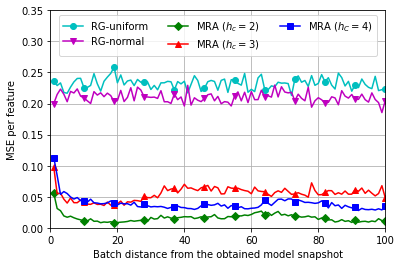

In [12]:
import matplotlib.pyplot as plt

plt.xlim([0,100])
plt.ylim([0,0.35])
plt.grid()
plt.ylabel('MSE per feature')
plt.xlabel('Batch distance from the obtained model snapshot')
ran = [i+1 for i in range(100)]http://localhost:8888/notebooks/sl-privacy/mra/mra-credit-resnet.ipynb#
plt.plot(
    ran, log_attack[2][:,0], 'co-',
    ran, log_attack[2][:,1], 'mv-',
    ran, log_attack[2][:,2], 'gD-',
    ran, log_attack[3][:,2], 'r^-',
    ran, log_attack[4][:,2], 'bs-',
    markevery=np.arange(0, 101, 9))
plt.legend(['RG-uniform', 'RG-normal', 'MRA ($h_c=2$)', 'MRA ($h_c=3$)', 'MRA ($h_C=4$)'], loc='upper center', ncol=3)
plt.savefig("fig/credit-resnet.pdf", bbox_inches='tight')